In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops, ImageEnhance

In [3]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'

    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

In [16]:
# image_height = 256
# image_width = 256

# loaded_model = load_model('/content/drive/MyDrive/fake_image_detection_model2.h5')

# image_path = '/content/drive/MyDrive/r4.jpg'
# image = Image.open(image_path)
# image = image.resize((image_height, image_width))
# image_array = np.array(image) / 255.0

# image_array = np.expand_dims(image_array, axis=0)

# predictions = loaded_model.predict(image_array)

# if predictions[0][0] >= 0.5:
#     prediction_label = "Real image"
#     prediction_probability = predictions[0][0]
# else:
#     prediction_label = "Edited image"
#     prediction_probability = 1 - predictions[0][0]

# plt.imshow(image)
# plt.title(f"Prediction: {prediction_label}\nProbability: {prediction_probability:.2f}")
# plt.axis('off')
# plt.show()


In [115]:
# image_height = 256
# image_width = 256

# loaded_model = load_model('/content/drive/MyDrive/fake_image_detection_model2.h5')

# image_path = '/content/drive/MyDrive/jj.jpg'
# image = Image.open(image_path)
# image = image.resize((image_height, image_width))
# image_array = np.array(image) / 255.0

# image_array = np.expand_dims(image_array, axis=0)

# predictions = loaded_model.predict(image_array)

# if predictions[0][0] >= 0.5:
#     prediction_label = "Real image"
#     prediction_probability = predictions[0][0]
# else:
#     prediction_label = "Edited image"
#     prediction_probability = 1 - predictions[0][0]

# plt.imshow(image)
# plt.title(f"Prediction: {prediction_label}\nProbability: {prediction_probability:.2f}")
# plt.axis('off')
# plt.show()


In [20]:
# from PIL import Image, ImageChops, ImageEnhance, ImageDraw
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import load_model

# loaded_model = load_model('/content/drive/MyDrive/fake_image_detection_model2.h5')

# image_path = '/content/drive/MyDrive/f1.jpg'
# quality = 50

# ela_img = convert_to_ela_image(image_path, quality)

# ela_array = np.array(ela_img)

# ela_gray = cv2.cvtColor(ela_array, cv2.COLOR_RGB2GRAY)

# threshold = 80
# _, thresh = cv2.threshold(ela_gray, threshold, 255, cv2.THRESH_BINARY)

# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# draw = ImageDraw.Draw(ela_img)

# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
#     draw.rectangle([x, y, x + w, y + h], outline="white", width=2)

# image_height = 256
# image_width = 256
# image = Image.open(image_path)
# image = image.resize((image_height, image_width))
# image_array = np.array(image) / 255.0
# image_array = np.expand_dims(image_array, axis=0)

# predictions = loaded_model.predict(image_array)

# if predictions[0][0] >= 0.5:
#     prediction_label = "Real image"
#     prediction_probability = predictions[0][0]
# else:
#     prediction_label = "Edited image"
#     prediction_probability = 1 - predictions[0][0]

# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# axes[0].imshow(image)
# axes[0].set_title(f"Prediction: {prediction_label}\nProbability: {prediction_probability:.2f}")
# axes[0].axis('off')

# axes[1].imshow(ela_img)
# axes[1].set_title("ELA Image Region Highlighted")
# axes[1].axis('off')

# plt.show()

1/1 [==============================] - 0s 148ms/step


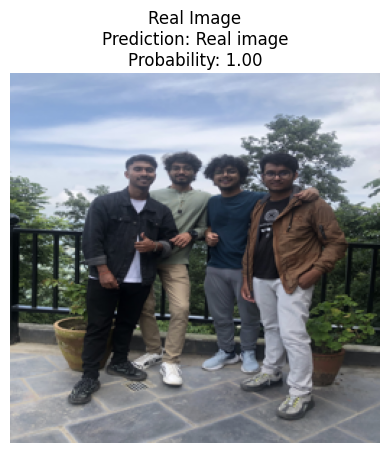

In [24]:
from PIL import Image, ImageChops, ImageEnhance, ImageDraw
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/fake_image_detection_model2.h5')

image_path = '/content/drive/MyDrive/r1.jpg'
quality = 50

ela_img = convert_to_ela_image(image_path, quality)

ela_array = np.array(ela_img)

ela_gray = cv2.cvtColor(ela_array, cv2.COLOR_RGB2GRAY)

threshold = 80
_, thresh = cv2.threshold(ela_gray, threshold, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

draw = ImageDraw.Draw(ela_img)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    draw.rectangle([x, y, x + w, y + h], outline="white", width=2)

image_height = 256
image_width = 256
image = Image.open(image_path)
image = image.resize((image_height, image_width))
image_array = np.array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

predictions = loaded_model.predict(image_array)

if predictions[0][0] >= 0.5:
    prediction_label = "Real image"
    prediction_probability = predictions[0][0]

    plt.imshow(image)
    plt.title(f"Real Image\nPrediction: {prediction_label}\nProbability: {prediction_probability:.2f}")
    plt.axis('off')
    plt.show()
else:
    prediction_label = "Edited image"
    prediction_probability = 1 - predictions[0][0]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(image)
    axes[0].set_title(f"Edited Image\nPrediction: {prediction_label}\nProbability: {prediction_probability:.2f}")
    axes[0].axis('off')

    axes[1].imshow(ela_img)
    axes[1].set_title("ELA Image Region Highlighted")
    axes[1].axis('off')

    plt.show()

In [14]:
# from PIL import Image, ImageChops, ImageEnhance, ImageDraw
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import load_model

# loaded_model = load_model('/content/drive/MyDrive/fake_image_detection_model2.h5')

# edited_image_path = '/content/drive/MyDrive/f2.jpg'
# real_image_path = '/content/drive/MyDrive/r2.jpg'

# quality = 50

# ela_img = convert_to_ela_image(edited_image_path, quality)

# ela_array = np.array(ela_img)

# ela_gray = cv2.cvtColor(ela_array, cv2.COLOR_RGB2GRAY)

# threshold = 80
# _, thresh = cv2.threshold(ela_gray, threshold, 255, cv2.THRESH_BINARY)

# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# draw = ImageDraw.Draw(ela_img)

# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
#     draw.rectangle([x, y, x + w, y + h], outline="white", width=2)

# image_height = 256
# image_width = 256
# edited_image = Image.open(edited_image_path)
# edited_image = edited_image.resize((image_height, image_width))
# edited_image_array = np.array(edited_image) / 255.0
# edited_image_array = np.expand_dims(edited_image_array, axis=0)

# edited_image_predictions = loaded_model.predict(edited_image_array)

# if edited_image_predictions[0][0] >= 0.5:
#     edited_image_prediction_label = "Real image"
#     edited_image_prediction_probability = edited_image_predictions[0][0]
# else:
#     edited_image_prediction_label = "Edited image"
#     edited_image_prediction_probability = 1 - edited_image_predictions[0][0]

# real_image = Image.open(real_image_path)
# real_image = real_image.resize((image_height, image_width))

# fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# axes[0].imshow(edited_image)
# axes[0].set_title(f"Edited Image\nPrediction: {edited_image_prediction_label}\nProbability: {edited_image_prediction_probability:.2f}")
# axes[0].axis('off')

# axes[1].imshow(real_image)
# axes[1].set_title("Real Image")
# axes[1].axis('off')

# axes[2].imshow(ela_img)
# axes[2].set_title("Edited Region of Image")
# axes[2].axis('off')

# plt.show()

In [15]:
# from PIL import Image, ImageChops, ImageEnhance, ImageDraw
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import load_model

# loaded_model = load_model('/content/drive/MyDrive/fake_image_detection_model2.h5')

# edited_image_path = '/content/drive/MyDrive/r4.jpg'
# real_image_path = '/content/drive/MyDrive/r1.jpg'

# quality = 50

# ela_img = convert_to_ela_image(edited_image_path, quality)

# ela_array = np.array(ela_img)

# ela_gray = cv2.cvtColor(ela_array, cv2.COLOR_RGB2GRAY)

# threshold = 80
# _, thresh = cv2.threshold(ela_gray, threshold, 255, cv2.THRESH_BINARY)

# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# draw = ImageDraw.Draw(ela_img)

# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
#     draw.rectangle([x, y, x + w, y + h], outline="white", width=2)

# image_height = 256
# image_width = 256
# edited_image = Image.open(edited_image_path)
# edited_image = edited_image.resize((image_height, image_width))
# edited_image_array = np.array(edited_image) / 255.0
# edited_image_array = np.expand_dims(edited_image_array, axis=0)

# edited_image_predictions = loaded_model.predict(edited_image_array)

# if edited_image_predictions[0][0] >= 0.5:
#     edited_image_prediction_label = "Real image"
#     edited_image_prediction_probability = edited_image_predictions[0][0]

#     print(f"Prediction: {edited_image_prediction_label}\nProbability: {edited_image_prediction_probability:.2f}")

#     real_image = Image.open(edited_image_path)
#     real_image = real_image.resize((image_height, image_width))

#     plt.figure(figsize=(6, 6))
#     plt.imshow(real_image)
#     plt.title(f"Real Image (Edited)\nPrediction: {edited_image_prediction_label}\nProbability: {edited_image_prediction_probability:.2f}")
#     plt.axis('off')
#     plt.show()
# else:
#     edited_image_prediction_label = "Edited image"
#     edited_image_prediction_probability = 1 - edited_image_predictions[0][0]

#     real_image = Image.open(real_image_path)
#     real_image = real_image.resize((image_height, image_width))

#     fig, axes = plt.subplots(1, 3, figsize=(18, 6))
#     axes[0].imshow(edited_image)
#     axes[0].set_title(f"Edited Image\nPrediction: {edited_image_prediction_label}\nProbability: {edited_image_prediction_probability:.2f}")
#     axes[0].axis('off')

#     axes[1].imshow(real_image)
#     axes[1].set_title("Real Image")
#     axes[1].axis('off')

#     axes[2].imshow(ela_img)
#     axes[2].set_title("Edited Region of Image")
#     axes[2].axis('off')

#     plt.show()